In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('./spam.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.sample(5)

,Category,Message
3352,ham,At what time are you coming.
2424,ham,Lmao but its so fun...
3430,ham,I don't know jack shit about anything or i'd s...
1314,ham,How abt making some of the pics bigger?
3880,ham,She left it very vague. She just said she woul...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['Category'] = encoder.fit_transform(df['Category']) 

In [10]:
df.head() # 0 -> ham, 1 -> spam.

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [12]:
# check for duplicate values
df.duplicated().sum()

415

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5157, 2)

## 2. EDA

In [16]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#count the number of hams and spams in df
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

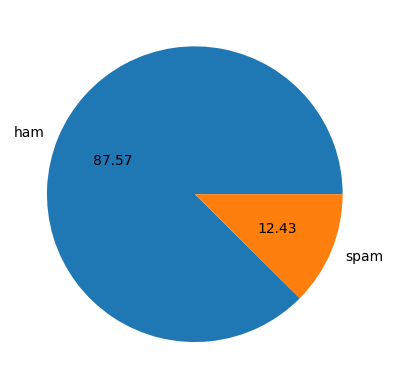

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
# Data is imbalanced

In [20]:
import nltk

In [21]:
# Add feature (column) num_characters
df['num_characters'] = df['Message'].apply(len)

In [22]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# Add feature num of words
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
#Add feature num of sentences
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Describe ham
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# Describe spam
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

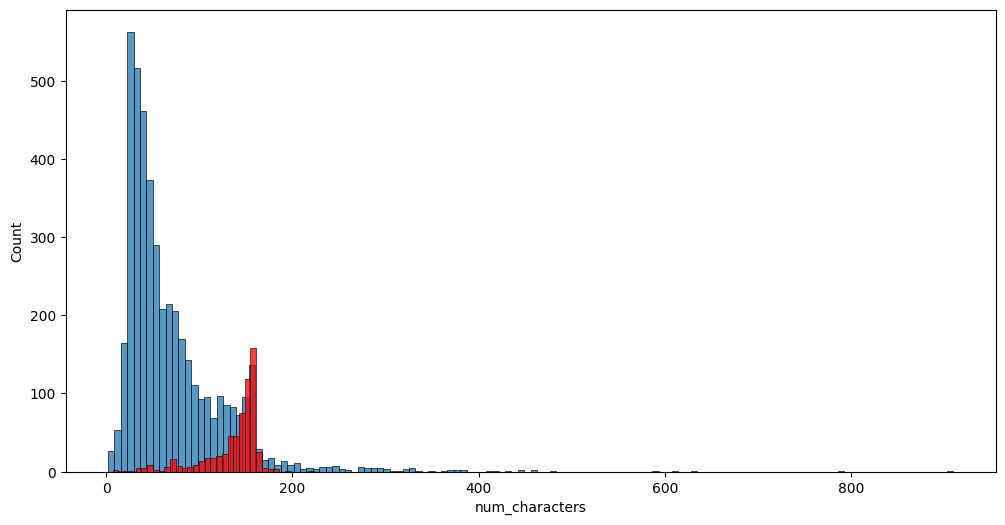

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

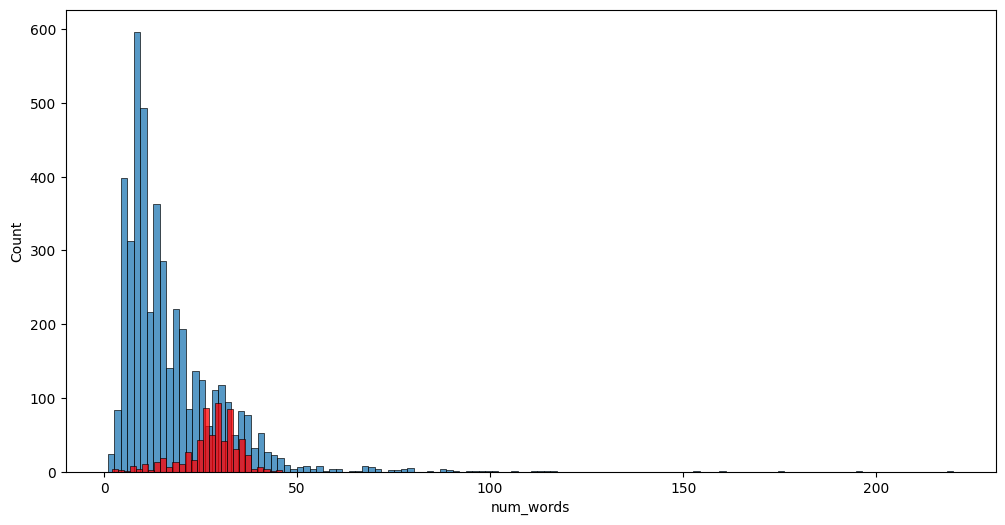

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'],color='red')

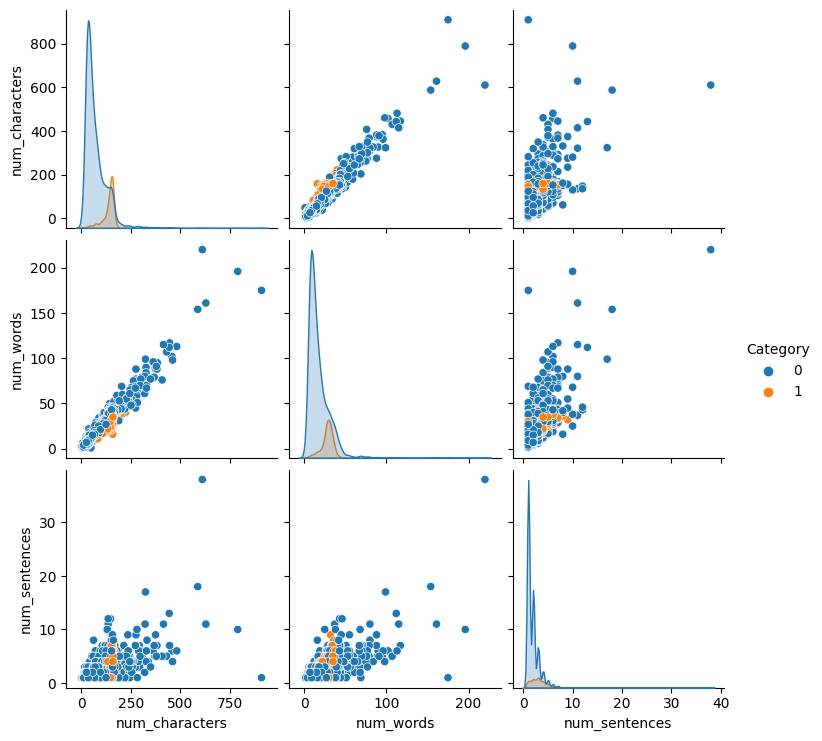

In [33]:
sns.pairplot(df,hue='Category')

<Axes: >

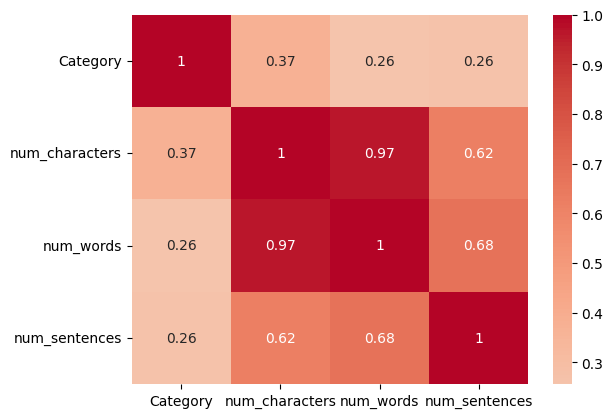

In [34]:
#TODO: sns heatmap corelation
# Select only the numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Calculate Pearson correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap using Seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)


## 3. Data Preprocessing
##### Lower case
##### Tokenization
##### Removing special characters
##### Removing stop words and punctuation
##### Stemming

In [35]:
import string
from nltk.corpus import stopwords
sw = set(stopwords.words('english'))

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    #removes special characters.
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    #stopwords and punctuation removal.
    for i in text:
        if i not in sw and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    #stemming
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [40]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4. Model Building

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
def extractFeatures(vectorizer):
    X = vectorizer.fit_transform(df['transformed_text']).toarray()
    y = df['Category'].values
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
    return X_train, X_test, y_train, y_test

In [43]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

In [44]:
def predict_model(clf, X_train, X_test, y_train, y_test):
    print(clf)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    print('Accuracy:', accuracy_score(y_test,y_pred))
    print('Precision:', precision_score(y_test,y_pred))
    print('F1 Score:',f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    #
    # Print the confusion matrix using Matplotlib
    #
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    return accuracy, precision

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [46]:
X_train, X_test, y_train, y_test = extractFeatures(cv)
accuracyCV = []
precisionCV = []

In [47]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
svc = SVC(kernel='sigmoid', gamma=1.0)
dtc = DecisionTreeClassifier(max_depth=5)
Classifiers = [gnb, mnb, bnb, svc, dtc]

GaussianNB()
Accuracy: 0.8691860465116279
Precision: 0.4826086956521739
F1 Score: 0.6218487394957983
Recall Score: 0.8740157480314961


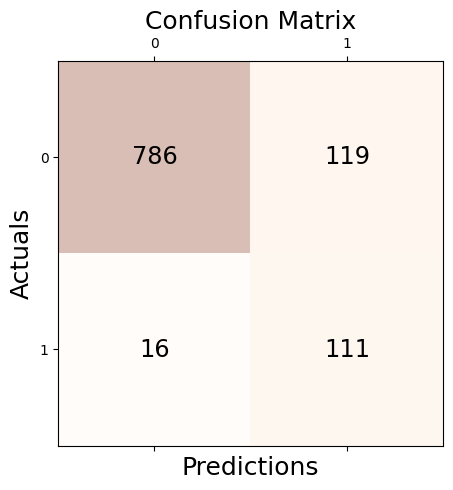

MultinomialNB()
Accuracy: 0.9796511627906976
Precision: 0.9206349206349206
F1 Score: 0.9169960474308301
Recall Score: 0.9133858267716536


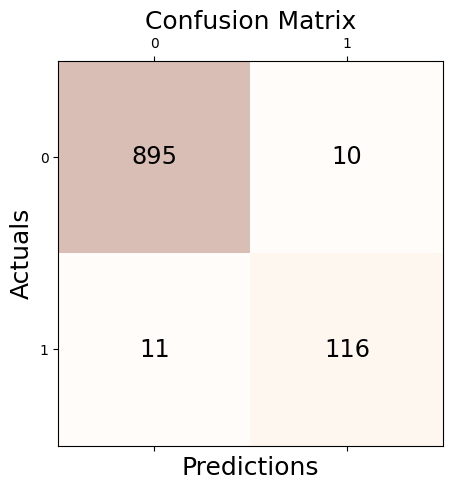

BernoulliNB()
Accuracy: 0.9718992248062015
Precision: 0.9711538461538461
F1 Score: 0.8744588744588745
Recall Score: 0.7952755905511811


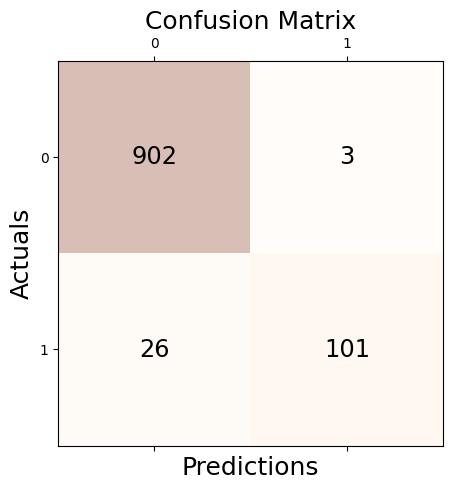

SVC(gamma=1.0, kernel='sigmoid')
Accuracy: 0.9244186046511628
Precision: 0.696
F1 Score: 0.6904761904761905
Recall Score: 0.6850393700787402


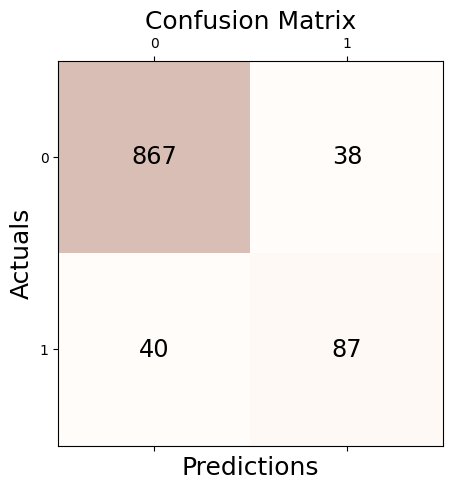

DecisionTreeClassifier(max_depth=5)
Accuracy: 0.9312015503875969
Precision: 0.9
F1 Score: 0.6395939086294417
Recall Score: 0.49606299212598426


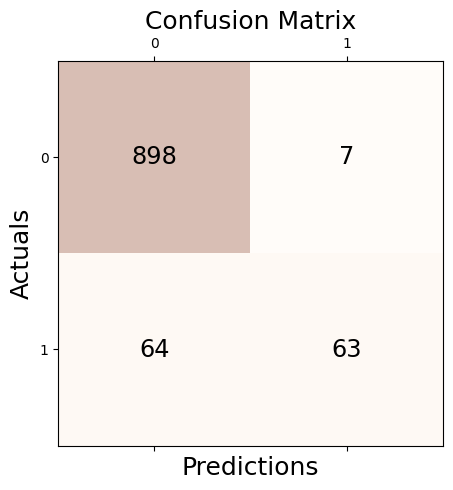

In [48]:
for clf in Classifiers:
    accuracy, precision = predict_model(clf, X_train, X_test, y_train, y_test)
    accuracyCV.append(accuracy)
    precisionCV.append(precision)

In [49]:
messages = [
    """
    Hi,
We invite you to participate in MishMash - India’s largest online diversity hackathon. 
The hackathon is a Skillenza initiative and sponsored by Microsoft, Unity, Unilever, Gojek, Rocketium and Jharkhand Government. 
We have a special theme for you - Deep Tech/Machine Learning - sponsored by Unilever, which will be perfect for you.
    """,
    """Join us today at 12:00 PM ET / 16:00 UTC for a Red Hat DevNation tech talk on AWS Lambda and serverless Java with Bill Burke.
Have you ever tried Java on AWS Lambda but found that the cold-start latency and memory usage were far too high? 
In this session, we will show how we optimized Java for serverless applications by leveraging GraalVM with Quarkus to 
provide both supersonic startup speed and a subatomic memory footprint.""",

    """We really appreciate your interest and wanted to let you know that we have received your application.
There is strong competition for jobs at Intel, and we receive many applications. As a result, it may take some time to get back to you.
Whether or not this position ends up being a fit, we will keep your information per data retention policies, 
so we can contact you for other positions that align to your experience and skill set.
"""
]

In [50]:
def prepare(messages):
    d = [transform_text(text) for text in messages]
    # dont do fit_transform!! it will create new vocab.
    return cv.transform(d)

messages = prepare(messages)
print(messages)

  (0, 1957)	1
  (0, 3031)	1
  (0, 3237)	1
  (0, 3252)	1
  (0, 3293)	1
  (0, 3572)	1
  (0, 3599)	1
  (0, 4364)	1
  (0, 4494)	1
  (0, 4545)	1
  (0, 5576)	1
  (0, 5610)	2
  (0, 5977)	1
  (1, 922)	1
  (1, 1218)	1
  (1, 2360)	1
  (1, 2455)	1
  (1, 2595)	1
  (1, 2615)	1
  (1, 2968)	1
  (1, 3034)	1
  (1, 3356)	3
  (1, 3399)	1
  (1, 3552)	2
  (1, 3919)	2
  :	:
  (2, 1926)	1
  (2, 2287)	1
  (2, 2407)	1
  (2, 2540)	1
  (2, 2752)	1
  (2, 3247)	1
  (2, 3278)	1
  (2, 3393)	1
  (2, 3467)	1
  (2, 3511)	1
  (2, 3622)	1
  (2, 3842)	1
  (2, 3884)	1
  (2, 4541)	1
  (2, 4697)	2
  (2, 4947)	1
  (2, 4959)	2
  (2, 5052)	1
  (2, 5289)	1
  (2, 5432)	1
  (2, 5723)	1
  (2, 5869)	1
  (2, 6041)	1
  (2, 6455)	1
  (2, 6545)	1


In [51]:
def predict_data(clf, messages):
    print(clf)
    y_pred = clf.predict(messages.toarray())
    for i in y_pred:
        if i == 0:
            print('ham', end=' ')
        else:
            print('spam', end=' ')
    print()

In [52]:
for clf in Classifiers:
    predict_data(clf, messages)

GaussianNB()
ham ham ham 
MultinomialNB()
ham spam ham 
BernoulliNB()
ham spam ham 
SVC(gamma=1.0, kernel='sigmoid')
ham ham spam 
DecisionTreeClassifier(max_depth=5)
ham ham ham 


## Optimizations

### 1. TF-IDF vectorization

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
accuracyTF = []
precisionTF = []

In [54]:
X_train, X_test, y_train, y_test = extractFeatures(tfidf)

GaussianNB()
Accuracy: 0.8691860465116279
Precision: 0.4824561403508772
F1 Score: 0.619718309859155
Recall Score: 0.8661417322834646


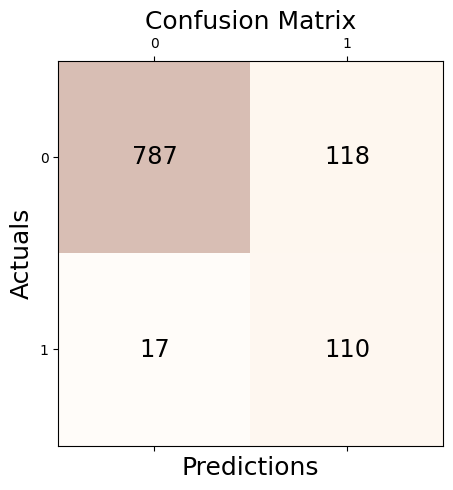

MultinomialNB()
Accuracy: 0.9612403100775194
Precision: 1.0
F1 Score: 0.8130841121495327
Recall Score: 0.6850393700787402


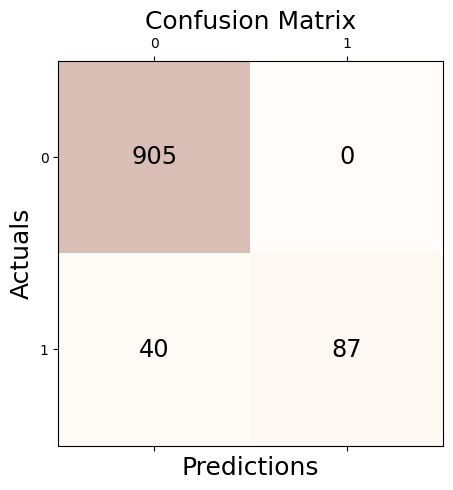

BernoulliNB()
Accuracy: 0.9718992248062015
Precision: 0.9711538461538461
F1 Score: 0.8744588744588745
Recall Score: 0.7952755905511811


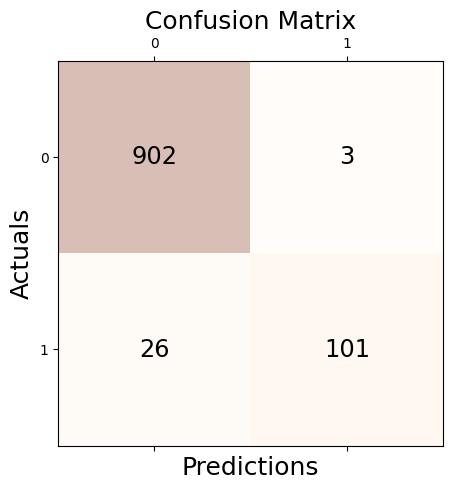

SVC(gamma=1.0, kernel='sigmoid')
Accuracy: 0.9718992248062015
Precision: 0.9803921568627451
F1 Score: 0.8733624454148472
Recall Score: 0.7874015748031497


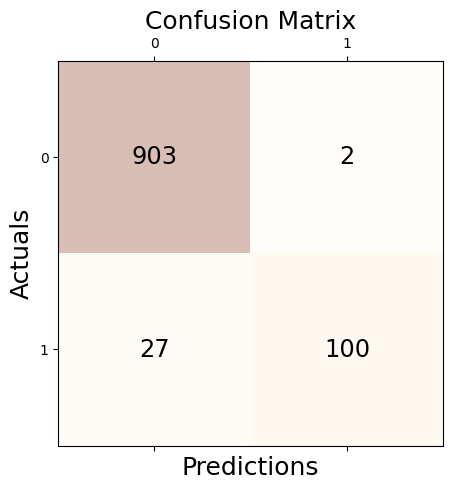

DecisionTreeClassifier(max_depth=5)
Accuracy: 0.938953488372093
Precision: 0.826530612244898
F1 Score: 0.72
Recall Score: 0.6377952755905512


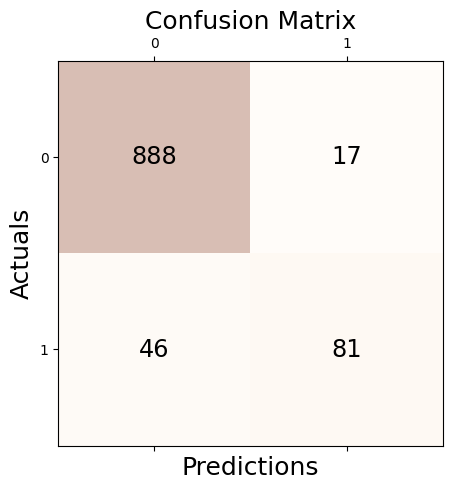

In [55]:
for clf in Classifiers:
    accuracy, precision = predict_model(clf, X_train, X_test, y_train, y_test)
    accuracyTF.append(accuracy)
    precisionTF.append(precision)

### 2. Limiting Maximum number of Features

In [56]:
tfidf = TfidfVectorizer(max_features=3000)

In [57]:
X_train, X_test, y_train, y_test = extractFeatures(tfidf)
accuracyTFlim = []
precisionTFlim = []

GaussianNB()
Accuracy: 0.8672480620155039
Precision: 0.4782608695652174
F1 Score: 0.6162464985994397
Recall Score: 0.8661417322834646


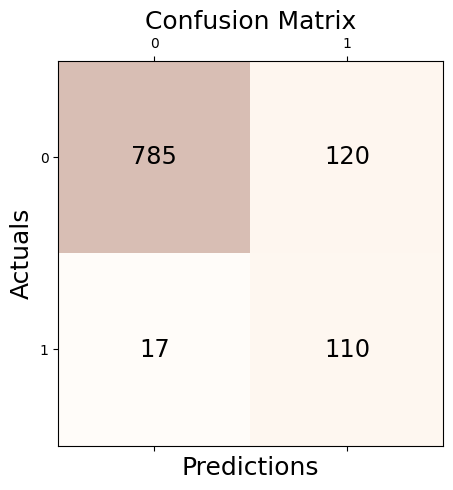

MultinomialNB()
Accuracy: 0.9709302325581395
Precision: 1.0
F1 Score: 0.8660714285714286
Recall Score: 0.7637795275590551


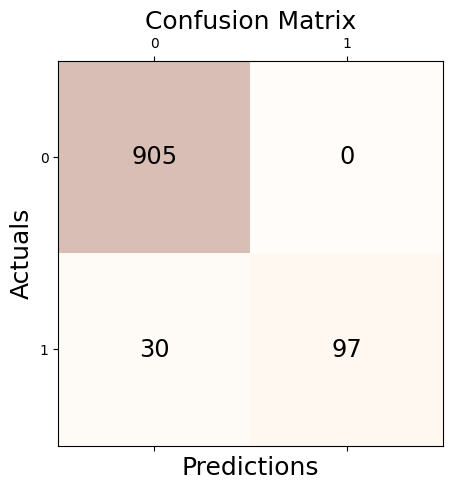

BernoulliNB()
Accuracy: 0.9835271317829457
Precision: 0.9824561403508771
F1 Score: 0.929460580912863
Recall Score: 0.8818897637795275


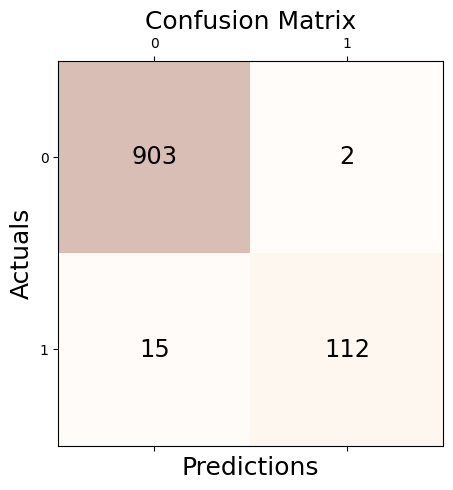

SVC(gamma=1.0, kernel='sigmoid')
Accuracy: 0.9757751937984496
Precision: 0.9811320754716981
F1 Score: 0.8927038626609441
Recall Score: 0.8188976377952756


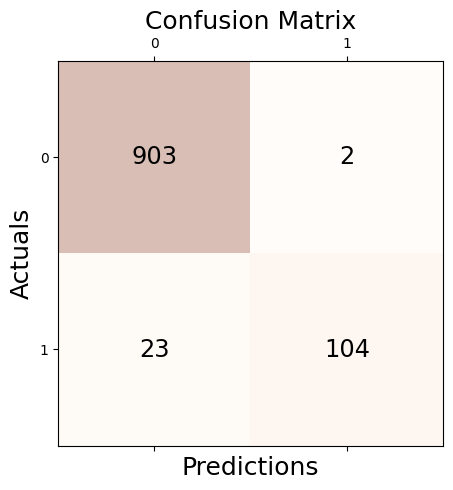

DecisionTreeClassifier(max_depth=5)
Accuracy: 0.936046511627907
Precision: 0.8210526315789474
F1 Score: 0.7027027027027027
Recall Score: 0.6141732283464567


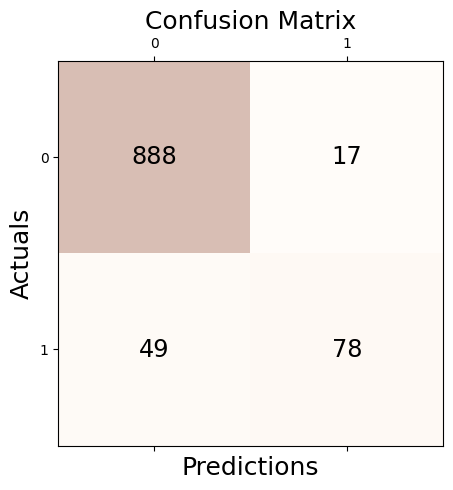

In [58]:
for clf in Classifiers:
    accuracy, precision = predict_model(clf, X_train, X_test, y_train, y_test)
    accuracyTFlim.append(accuracy)
    precisionTFlim.append(precision)

In [59]:
accuracyCV

[0.8691860465116279,
 0.9796511627906976,
 0.9718992248062015,
 0.9244186046511628,
 0.9312015503875969]

In [60]:
performance_df = pd.DataFrame({
    'Algorithm': Classifiers,
    'Accuracy-CV': accuracyCV,
    'Precision-CV': precisionCV,
    'Accuracy-TF': accuracyTF,
    'Precision-TF': precisionTF,
    'Accuracy-TF-limit': accuracyTFlim,
    'Precision-TF-limit': precisionTFlim
})

In [61]:
performance_df

,Algorithm,Accuracy-CV,Precision-CV,Accuracy-TF,Precision-TF,Accuracy-TF-limit,Precision-TF-limit
0,GaussianNB(),0.869186,0.482609,0.869186,0.482456,0.867248,0.478261
1,MultinomialNB(),0.979651,0.920635,0.961240,1.000000,0.970930,1.000000
2,BernoulliNB(),0.971899,0.971154,0.971899,0.971154,0.983527,0.982456
3,"SVC(gamma=1.0, kernel='sigmoid')",0.924419,0.696000,0.971899,0.980392,0.975775,0.981132
4,DecisionTreeClassifier(max_depth=5),0.931202,0.900000,0.938953,0.826531,0.936047,0.821053
